In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#DATA PREPARATION
data = np.load('/home/isabelle/Downloads/latest_coin_data.pkl')
#drop null data
data = data.dropna()


In [3]:
def share_cap_recurse(market_cap_list, num_coins, cap_ceiling_amount, final_cap_list):

    not_realloc_val = 0

    realloc_val = 0

    num_final = 0

    new_market_cap_list = []

    

    for i in range(0, len(market_cap_list)):

        if(market_cap_list[i] > cap_ceiling_amount):

            final_cap_list.append(cap_ceiling_amount)

            realloc_val += market_cap_list[i] - cap_ceiling_amount

            num_final += 1

        else:

            not_realloc_val += market_cap_list[i]

     

    if(num_final!=0):

        new_market_cap_list = [x * (1+(realloc_val/not_realloc_val)) for x in market_cap_list[num_final:]]

    else:

        new_market_cap_list = deepcopy(market_cap_list)

    

    if len(final_cap_list) == num_coins:

        return

    elif (new_market_cap_list[0] <= cap_ceiling_amount): #assumes ordered desc in market cap

        for cap in new_market_cap_list:

            final_cap_list.append(cap)

        return       

    else:

        share_cap_recurse(new_market_cap_list, num_coins, cap_ceiling_amount, final_cap_list)

        

def share_cap(market_cap_list, cap_ceiling_percent):  #CHANGE CAP CEILING HERE

    total_cap = sum(market_cap_list)

    cap_ceiling_amount = total_cap * cap_ceiling_percent

    final_cap_list = []

    

    share_cap_recurse(market_cap_list, len(market_cap_list), cap_ceiling_amount, final_cap_list)

    

    return (final_cap_list)

In [4]:
close_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        close_list.append(data[column][date]['close_price'])

# Splitting list into 133 lists (one per coin)
close_list2 = [close_list[i:i+916] for i  in range(0, len(close_list), 916)]

# Make an array
close_ar = np.asarray(close_list2)

# Make Close DataFrame
close_df = pd.DataFrame(data = close_ar, index = data.index, columns = data.columns)
close_df = close_df[close_df.columns[::-1]]

In [5]:
# Initialize a volumes list
volumes_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        if data[column][date] == 0:
            volumes_list.append(data[column][date])
        else:
            volumes_list.append(data[column][date]['volume'])
            
volumes_list = [volumes_list[i:i+916] for i  in range(0, len(volumes_list), 916)]   
# Making dataframe
vol_data = pd.DataFrame(data = volumes_list, index = data.index, columns = data.columns)
vol_data = vol_data[vol_data.columns[::-1]]

In [6]:
# Initialize a market_cap list
market_list = list()
# Making a list of all market_cap
for date in data.index:
    for column in data.columns:
        market_list.append(data[column][date]['market_cap'])

# Splitting list into 133 lists (one per coin)
market_list2 = [market_list[i:i+916] for i  in range(0, len(market_list), 916)]

# Make an array
market_ar = np.asarray(market_list2)
    
# Make Market Cap DataFrame
market_df = pd.DataFrame(data = market_ar, index = data.index, columns = data.columns)
market_df = market_df[market_df.columns[::-1]]

In [14]:
#Selecting data for startdate to enddate
selectedmarket = market_df.loc[:, 'Jan 01, 2017':'Jan 01, 2018':7]
selectedmarket = selectedmarket.iloc[:, :-1]
selectedclose = close_df.loc[:, 'Jan 01, 2017':'Jan 01, 2018':7]
selectedvolume = vol_data.loc[:, 'Jan 01, 2017':'Jan 01, 2018':7]

In [15]:
usdt_vol = pd.DataFrame(data = selectedvolume.loc['tether'])
usdt_close = pd.DataFrame(data = selectedclose.loc['tether'])
usdt_close.head()

,tether
"Jan 01, 2017",1.0
"Jan 08, 2017",1.0
"Jan 15, 2017",1.0
"Jan 22, 2017",1.0
"Jan 29, 2017",1.0


In [16]:
#Generating returns dataframe
selectedclose1 = selectedclose.copy().T
selectedreturns = selectedclose1.pct_change(1).T

In [17]:
usdt_returns = usdt_close.pct_change(1)

In [19]:
cols = selectedreturns.columns[:-1]
selectedreturns = selectedreturns.drop('Jan 01, 2017', 1)
selectedreturns.columns = cols

usdtindex = usdt_returns.index[:-1]
usdt_returns = usdt_returns.drop('Jan 01, 2017', 0)
usdt_returns.index = usdtindex

USDT weekly returns and weekly returns of all coins generated above

NEXT:

USDT weekly volume changes



In [40]:
usdt_returns

,tether
"Jan 01, 2017",0.000000
"Jan 08, 2017",0.000000
"Jan 15, 2017",0.000000
"Jan 22, 2017",0.000000
"Jan 29, 2017",-0.000001
"Feb 05, 2017",0.000000
"Feb 12, 2017",-0.000101
"Feb 19, 2017",0.000102
"Feb 26, 2017",0.000000
"Mar 05, 2017",0.000000


In [22]:
usdt_vol_change = usdt_vol.pct_change(1)


In [28]:
usdt_vol_change['date'] = usdt_vol_change.index
usdt_vol_change = usdt_vol_change.reset_index(drop=True)
usdt_vol_change.head()

,tether,date
0,NaN,"Jan 01, 2017"
1,0.952970,"Jan 08, 2017"
2,-0.648939,"Jan 15, 2017"
3,0.970717,"Jan 22, 2017"
4,-0.716644,"Jan 29, 2017"


In [79]:
usdt_share = {}
usdt_share[0] = 0.15      #USDT starts off with 10% for start date

#for dates in usdt_vol_change.index:
    
for i in range(1, len(usdt_vol_change)):
    if usdt_vol_change.loc[i, 'tether'] > 0:
        usdt_share[i] = usdt_share[i -1] + 0.01
    elif usdt_vol_change.loc[i, 'tether'] < 0: 
        usdt_share[i] = usdt_share[i -1] - 0.01
    else:
        usdt_share[i] = usdt_share[i -1]
        


#if USDT vol increases, share increases by 0.01
#if USDT vol decreases, share decreases by 0.01
#if USDT vol stays same, share stays same

In [80]:
ilist = range(0, len(usdt_vol_change))

tethershare = {}
         
for (i, column) in zip(ilist, selectedmarket):
    tethershare[column] = usdt_share[i]
         
#sets all tethershare labels to match dates

In [81]:
#FOR LOOP FOR C10
topmc10 = {}
sc10 = {}
tc10 = {}
ps10 = {}
invest10 = {}
returns10 = {}
lg_returns10 = {}
selectedmc10 = {}
topcoins10 = {}
c10share = {}
tetherreturns = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc10[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc10[column] = selectedmc10[column].head(10)
    #take the index of the top coins
    topcoins10[column] = topmc10[column].index
    
    #get the share cap of the top 10
    sc10[column] = share_cap(topmc10[column], 0.15)      #CHOICE OF CAP CEILING
    
    #total cap of top 10
    tc10[column] = sum(sc10[column])
    
    #percentage of total fund allocated to tether/C10- NEW CODE!!
    c10share[column] = 1 - tethershare[column]
    
    #percentage share to be allocated for top 20 - NEW CODE!!!
    ps10[column] = [x * c10share[column] / tc10[column] for x in sc10[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest10[column] = pd.DataFrame()
    invest10[column] = pd.DataFrame({'coin': topcoins10[column], 'pct_share': ps10[column]})
    invest10[column] = invest10[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns10[column] = pd.DataFrame()
        returns10[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns10[column] = returns10[column].loc[topcoins10[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns10 = {}
    portfolio_total_returns10 = list()
   
    #tether returns
    tetherreturns[column] = tethershare[column]* usdt_returns.loc[column, 'tether']

    for i, df in invest10.items():
        portfolio_simple_returns10[i] = (invest10[i].transpose().dot(returns10[i])) + tetherreturns[i]
        portfolio_total_returns10.append(portfolio_simple_returns10[i]['returns'])      

In [51]:
#FOR C10 compiling and cleaning the table into a readable format WITH TETHER
final_portfolio_simple_returns10_tether = pd.DataFrame(portfolio_total_returns10) 
final_portfolio_simple_returns10_tether.columns = ['weekly_portfolio_simple_returns']
final_portfolio_simple_returns10_tether['date'] = selectedreturns.T.index
final_portfolio_simple_returns10_tether = final_portfolio_simple_returns10_tether.set_index('date')

In [52]:
#FOR C10  WITH TETHER
final_cum10_tether = (1 + final_portfolio_simple_returns10_tether).cumprod()

In [82]:
final_cum10_tether

,weekly_portfolio_simple_returns
date,
"Jan 01, 2017",1.007777
"Jan 08, 2017",0.975745
"Jan 15, 2017",1.045898
"Jan 22, 2017",1.064857
"Jan 29, 2017",1.130480
"Feb 05, 2017",1.120735
"Feb 12, 2017",1.176983
"Feb 19, 2017",1.224152
"Feb 26, 2017",1.461849


In [53]:
#FOR LOOP FOR C10
topmc10 = {}
sc10 = {}
tc10 = {}
ps10 = {}
invest10 = {}
returns10 = {}
lg_returns10 = {}
selectedmc10 = {}
topcoins10 = {}
c10share = {}
tetherreturns = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc10[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc10[column] = selectedmc10[column].head(10)
    #take the index of the top coins
    topcoins10[column] = topmc10[column].index
    
    #get the share cap of the top 10
    sc10[column] = share_cap(topmc10[column], 0.15)      #CHOICE OF CAP CEILING
    
    #total cap of top 10
    tc10[column] = sum(sc10[column])
    
    #percentage of total fund allocated to tether/C10- NEW CODE!!
    #c10share[column] = 1 - tethershare[column]
    
    #percentage share to be allocated for top 20 - NEW CODE!!!
    ps10[column] = [x  / tc10[column] for x in sc10[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest10[column] = pd.DataFrame()
    invest10[column] = pd.DataFrame({'coin': topcoins10[column], 'pct_share': ps10[column]})
    invest10[column] = invest10[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns10[column] = pd.DataFrame()
        returns10[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns10[column] = returns10[column].loc[topcoins10[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns10 = {}
    portfolio_total_returns10 = list()
   
    #tether returns
    #tetherreturns[column] = tethershare[column]* usdt_returns.loc[column, 'tether']

    for i, df in invest10.items():
        portfolio_simple_returns10[i] = (invest10[i].transpose().dot(returns10[i])) #+ tetherreturns[i]
        portfolio_total_returns10.append(portfolio_simple_returns10[i]['returns'])  

In [54]:
#FOR C10 compiling and cleaning the table into a readable format
final_portfolio_simple_returns10 = pd.DataFrame(portfolio_total_returns10) 
final_portfolio_simple_returns10.columns = ['weekly_portfolio_simple_returns']
final_portfolio_simple_returns10['date'] = selectedreturns.T.index
final_portfolio_simple_returns10 = final_portfolio_simple_returns10.set_index('date')

In [55]:
#FOR C10 
final_cum10 = (1 + final_portfolio_simple_returns10).cumprod()

https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

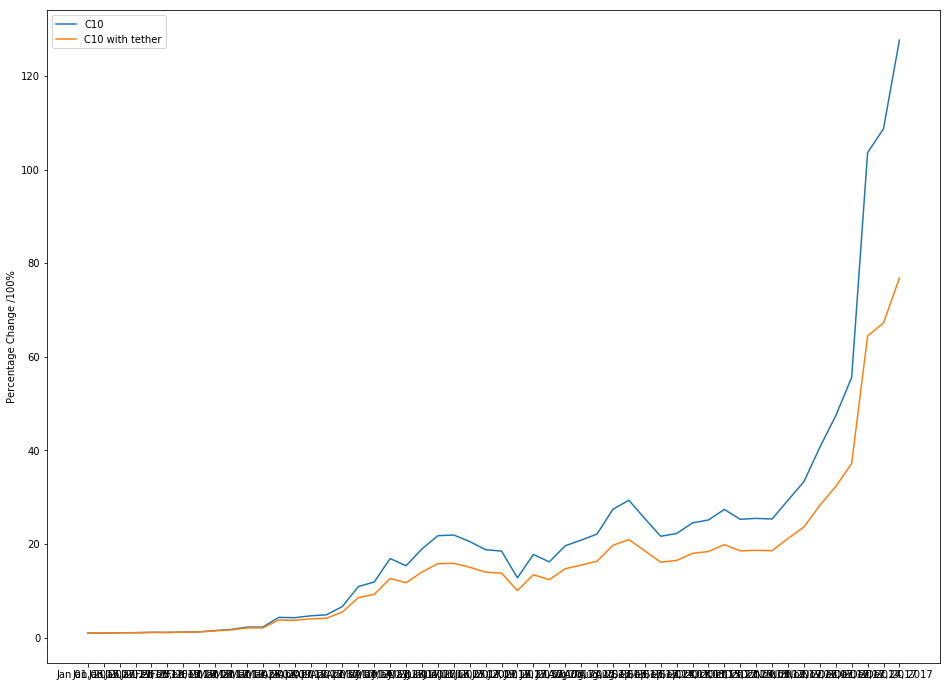

In [58]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,12))

ax.set_ylabel('Percentage Change /100%')

ax.plot(final_cum10.index, final_cum10, label="C10")
ax.plot(final_cum10_tether.index, final_cum10_tether, label="C10 with tether")

ax.legend()

In [78]:
tethershare['Oct 22, 2017']

0.12000000000000001